# Learning Objectives

- Use the `gte-large` model hosted on Anyscale to create embeddings for input text.
- Use embeddings to implement semantic search.

# Setup

In [1]:
!pip install -q openai==1.23.2 datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00


# Authentication

Paste your Anyscale API key in the secrets tab in the left panel.

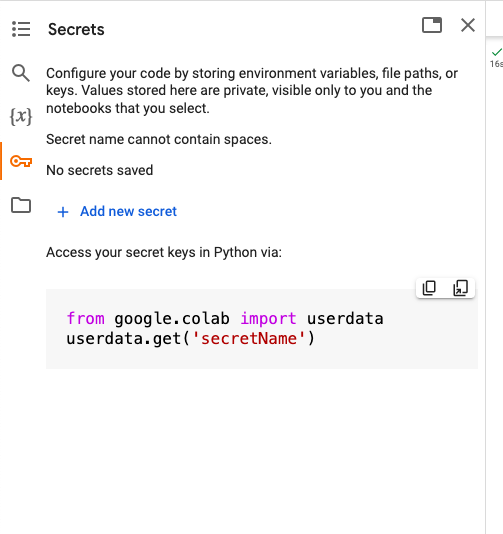

Ensure that you enable notebook access

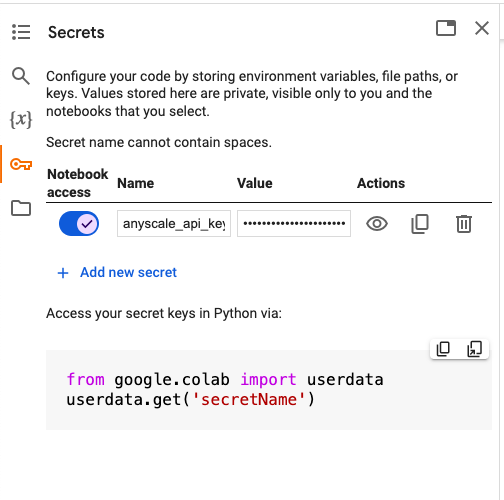

In [2]:
from openai import OpenAI
from datasets import load_dataset
from scipy.spatial.distance import cosine

from google.colab import userdata

Now we can read the API key from Colab secrets. This way we do not expose our API keys in a notebook.

In [3]:
anyscale_api_key = userdata.get('anyscale_api_key')

In [4]:
client = OpenAI(
    base_url="https://api.endpoints.anyscale.com/v1",
    api_key=anyscale_api_key
)

In [5]:
embedding_model_name = 'thenlper/gte-large'

# Example: Document Similarity

Consider that we are summarizing product reviews. We want to understand if a review from an LLM (say Mistral) is close to a human summary. We can extract embeddings for these two summaries and compare how close they are using cosine distance.

In [6]:
ai_generated_summary = "Colossal disappointment with constant glitches, defects, and a malfunctioning camera."
human_generated_summary = "Incredibly let down by the never-ending issues – glitches, defects, and a camera that just won't cooperate."

In [7]:
ai_summary_embedding = client.embeddings.create(
    model=embedding_model_name,
    input=ai_generated_summary,
)

In [8]:
ai_summary_embedding_data = ai_summary_embedding.data[0].embedding

In [9]:
human_summary_embedding = client.embeddings.create(
    model=embedding_model_name,
    input=human_generated_summary
)

In [10]:
human_summary_embedding_data = human_summary_embedding.data[0].embedding

In [11]:
cosine(
    ai_summary_embedding_data, human_summary_embedding_data
)

0.044326065281532046

Cosine distance close to 0 indicates that the two input texts (in this case AI-generated summary and human-generated summary) are close to each other.